# Computing Square Roots


## Introduction

Chapter 24 of {cite}`russell2004history` about early Greek mathematics and astronomy contains this
fascinating passage:

 ```{epigraph} 
 The square root of 2, which was the first irrational to be discovered, was known to the early Pythagoreans, and ingenious methods of approximating to its value were discovered. The best was as follows: Form two columns of numbers, which we will call the $a$'s and the $b$'s; each starts with a $1$. The next $a$, at each stage, is formed by adding the last $a$ and the $b$ already obtained; the next $b$ is formed by adding twice the previous $a$ to the previous $b$. The first 6 pairs so obtained are $(1,1), (2,3), (5,7), (12,17), (29,41), (70,99)$. In each pair, $2 a - b$ is $1$ or $-1$. Thus $b/a$ is nearly the square root of two, and at each fresh step it gets nearer. For instance, the reader may satisy himself that the square of $99/70$ is very nearly equal to $2$.
 ```

This lecture drills down and studies this ancient method for computing square roots by using some of the matrix algebra that we've learned in earlier quantecon lectures. 

In particular, this lecture can be viewed as a sequel to {doc}`eigen_I`.

It  provides an  example of how eigenvectors isolate  *invariant subspaces* that help construct and analyze solutions of linear difference equations. 

When vector $x_t$ starts in an invariant subspace, iterating the different equation keeps $x_{t+j}$
in that subspace for all $j \geq 1$.  

Invariant subspace methods are used throughout applied economic dynamics, for example, in the lecture {doc}`money_inflation`.

Our approach here  is to illustrate the method with an ancient example, one that ancient Greek mathematicians used to compute square roots of positive integers.

## Perfect squares and irrational numbers

An integer is called a **perfect square** if its square root is also an integer.

An ordered sequence of  perfect squares starts with 

$$
4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, \ldots 
$$

If an integer is not a perfect square, then its square root is an irrational number -- i.e., it cannot be expressed as a ratio of two integers, and its decimal expansion is indefinite.

The ancient Greeks invented an algorithm to compute square roots of integers, including integers that are not perfect squares.

Their method involved

 * computing a particular sequence of integers $\{y_t\}_{t=0}^\infty$;
 
 * computing $\lim_{t \rightarrow \infty} \left(\frac{y_{t+1}}{y_t}\right) = \bar r$;
 
 * deducing the desired square root from $\bar r$.
 
In this lecture, we'll describe this method.

We'll also use invariant subspaces to describe variations on this method that are faster.

## Second-order linear difference equations

Before telling how the ancient Greeks computed square roots, we'll provide a quick introduction
to second-order linear difference equations.

We'll study  the following second-order linear difference equation

$$
y_t = a_1 y_{t-1} + a_2 y_{t-2}, \quad t \geq 0
$$ (eq:2diff1)

where $(y_{-1},  y_{-2})$ is a pair of given initial conditions.  

Equation {eq}`eq:2diff1` is actually an infinite number of linear equations in the sequence
$\{y_t\}_{t=0}^\infty$.

There is one equation each for $t = 0, 1, 2, \ldots$.  

We could follow an approach taken in the lecture on {doc}`present values<pv>` and stack all of these equations into a single matrix equation that we would then solve by using matrix inversion.

```{note} 
In the present instance, the matrix equation would multiply a countably infinite dimensional square matrix by  a countably infinite dimensional vector.  With some qualifications, matrix multiplication and inversion tools apply to such an equation.
```

But we won't pursue that approach here. 


Instead, we'll seek to find a time-invariant function that *solves* our difference equation, meaning
that it provides a formula for a $\{y_t\}_{t=0}^\infty$ sequence that satisfies 
equation {eq}`eq:2diff1` for each $t \geq 0$.

We seek an expression  for $y_t, t \geq 0$ as functions of the initial conditions  $(y_{-1},  y_{-2})$:

$$ 
y_t = g((y_{-1},  y_{-2});t), \quad t \geq 0.
$$ (eq:2diff2)

We call such a function $g$ a *solution* of the difference equation {eq}`eq:2diff1`.

One way to discover a solution is to use a guess and verify method.

We shall begin by considering a special initial pair of initial  conditions
that satisfy

$$
y_{-1} = \delta y_{-2}
$$ (eq:2diff3)

where $\delta$ is a scalar to be determined.

For initial condition that satisfy {eq}`eq:2diff3`
equation {eq}`eq:2diff1` impllies that

$$
y_0 = \left(a_1 + \frac{a_2}{\delta}\right) y_{-1}.
$$ (eq:2diff4)

We want 

$$
\left(a_1 + \frac{a_2}{\delta}\right) = \delta
$$ (eq:2diff5)

which we can rewrite as the *characteristic equation* 

$$
\delta^2 - a_1 \delta - a_2 = 0.
$$ (eq:2diff6)

Applying the quadratic formula to solve for the roots of {eq}`eq:2diff6` we find that

$$
\delta = \frac{ a_1 \pm \sqrt{a_1^2 + 4 a_2}}{2}.
$$ (eq:2diff7)

For either of the two $\delta$'s that satisfy equation {eq}`eq:2diff7`, 
a solution of difference equation {eq}`eq:2diff1` is 

$$
y_t = \delta^t y_0 , \forall t \geq 0
$$ (eq:2diff8)

provided that we set 

$$
y_0 = \delta  y_{-1} . 
$$ 

The *general* solution of difference equation {eq}`eq:2diff1` takes the form

$$
y_t = \eta_1 \delta_1^t + \eta_2 \delta_2^t
$$ (eq:2diff9)

where $\delta_1, \delta_2$ are the two solutions {eq}`eq:2diff7` of the characteristic equation {eq}`eq:2diff6`, and  $\eta_1, \eta_2$ are two constants chosen to satisfy
    
$$ 
    \begin{bmatrix} y_{-1} \cr y_{-2} \end{bmatrix} = \begin{bmatrix} \delta_1^{-1}  & \delta_2^{-1} \cr \delta_1^{-2} & \delta_2^{-2} \end{bmatrix} \begin{bmatrix} \eta_1 \cr \eta_2 \end{bmatrix} 
$$ (eq:2diff10)

or

$$
\begin{bmatrix} \eta_1 \cr \eta_2 \end{bmatrix} = \begin{bmatrix} \delta_1^{-1}  & \delta_2^{-1} \cr \delta_1^{-2} & \delta_2^{-2} \end{bmatrix}^{-1} \begin{bmatrix} y_{-1} \cr y_{-2} \end{bmatrix}
$$ (eq:2diff11)

Sometimes we are free to choose the initial conditions $(y_{-1}, y_{-2})$, in which case we 
use system {eq}`eq:2diff10` to find the associated $(\eta_1, \eta_2)$.

If we choose $(y_{-1}, y_{-2})$ to set $(\eta_1, \eta_2) = (1, 0)$, then $y_t = \delta_1^t$ for all $t \geq 0$.


If we choose $(y_{-1}, y_{-2})$ to set $(\eta_1, \eta_2) = (0, 1)$, then $y_t = \delta_2^t$ for all $t \geq 0$.

Soon we'll relate the preceding calculations to components an eigen decomposition of a transition matrix that represents difference equation {eq}`eq:2diff1` in a very convenient way.

We'll turn to that after we describe how Ancient Greeks figured out how to compute square roots of positive integers that are not perfect squares.


## Algorithm of the Ancient Greeks

Let $\sigma$ be a positive  integer greater than $1$.

So $\sigma \in {\mathcal I} \equiv  \{2, 3, \ldots \}$.

We want an algorithm to compute the square root of $\sigma \in {\mathcal I}$.

If $\sqrt{\sigma} \in {\mathcal I}$, $\sigma $ is said to be a *perfect square*.

If $\sqrt{\sigma} \not\in {\mathcal I}$, it turns out that it is irrational.

Ancient Greeks used a recursive algorithm to compute square roots of integers that are not perfect squares. 

The algorithm iterates on a  second-order  linear  difference equation in the sequence $\{y_t\}_{t=0}^\infty$:

$$
y_{t} = 2 y_{t-1} - (1 - \sigma) y_{t-2}, \quad t \geq 0
$$ (eq:second_order)

together with a pair of integers that are initial conditions for $y_{-1}, y_{-2}$.

First, we'll deploy some techniques for solving the difference equations that are also deployed in {doc}`dynam:samuelson`.

The characteristic equation associated with difference equation {eq}`eq:second_order` is

$$
c(x) \equiv x^2 - 2 x + (1 - \sigma) = 0
$$ (eq:cha_eq0)

(Notice how this is an instance of equation {eq}`eq:2diff6` above.)

Factoring the right side of   equation {eq}`eq:cha_eq0`, we obtain 

$$
c(x)= (x - \lambda_1) (x-\lambda_2) = 0
$$(eq:cha_eq)


where 

$$ 
c(x) = 0 
$$

for $x = \lambda_1$ or $x = \lambda_2$.

These two special values of $x$ are sometimes called zeros or roots of $c(x)$.


By applying the quadratic formula to solve for the roots  the characteristic equation 
{eq}`eq:cha_eq0`, we find that

$$
\lambda_1 = 1 + \sqrt{\sigma}, \quad \lambda_2 = 1 - \sqrt{\sigma}.
$$ (eq:secretweapon)

Formulas {eq}`eq:secretweapon` indicate that  $\lambda_1$ and  $\lambda_2$ are each functions
of a single variable, namely,  $\sqrt{\sigma}$, the object that we along with some Ancient Greeks want to compute.

Ancient Greeks had an indirect way of exploiting this fact to compute square roots of a positive integer.

They did this by starting from particular initial conditions $y_{-1}, y_{-2}$ and iterating on the difference equation {eq}`eq:second_order`.


Solutions  of  difference equation {eq}`eq:second_order` take the form

$$
y_t = \lambda_1^t \eta_1 + \lambda_2^t \eta_2
$$

where $\eta_1$ and $\eta_2$ are chosen to satisfy   prescribed initial conditions $y_{-1}, y_{-2}$:

$$
\begin{aligned}
\lambda_1^{-1} \eta_1 + \lambda_2^{-1} \eta_2 & =  y_{-1} \cr
\lambda_1^{-2} \eta_1 + \lambda_2^{-2} \eta_2 & =  y_{-2}
\end{aligned}
$$(eq:leq_sq)

System {eq}`eq:leq_sq` of simultaneous linear equations will play a big role in the remainder of this lecture.  

Since $\lambda_1 = 1 + \sqrt{\sigma} > 1 > \lambda_2 = 1 - \sqrt{\sigma} $,
it follows that for *almost all* (but not all) initial conditions

$$
\lim_{t \rightarrow \infty} \left(\frac{y_{t+1}}{y_t}\right) = 1 + \sqrt{\sigma}.
$$

Thus,

$$
\sqrt{\sigma} = \lim_{t \rightarrow \infty} \left(\frac{y_{t+1}}{y_t}\right) - 1.
$$

However, notice that if $\eta_1 = 0$, then

$$
\lim_{t \rightarrow \infty} \left(\frac{y_{t+1}}{y_t}\right) = 1 - \sqrt{\sigma}
$$

so that 

$$
\sqrt{\sigma} = 1 - \lim_{t \rightarrow \infty} \left(\frac{y_{t+1}}{y_t}\right).
$$

Actually, if $\eta_1 =0$, it follows that

$$
\sqrt{\sigma} = 1 - \left(\frac{y_{t+1}}{y_t}\right) \quad \forall t \geq 0,
$$

so that convergence is immediate and there is no need to take limits.

Symmetrically, if $\eta_2 =0$, it follows that 


$$
\sqrt{\sigma} =  \left(\frac{y_{t+1}}{y_t}\right) - 1 \quad \forall t \geq 0
$$

so again, convergence is immediate, and we have no need to compute a limit.


System {eq}`eq:leq_sq` of simultaneous linear equations can be used in various ways.

 * we can take $y_{-1}, y_{-2}$ as given initial conditions and solve for $\eta_1, \eta_2$;
 
 * we can instead take $\eta_1, \eta_2$ as given and solve for initial conditions  $y_{-1}, y_{-2}$.
 
Notice how we used the  second approach above when we set  $\eta_1, \eta_2$  either to $(0, 1)$, for example, or $(1, 0)$, for example.

In taking this second approach, we constructed an *invariant subspace* of ${\bf R}^2$. 

Here is what is going on.  

For $ t \geq 0$ and for most pairs of  initial conditions $(y_{-1}, y_{-2}) \in {\bf R}^2$ for equation {eq}`eq:second_order`, $y_t$ can be expressed as a linear combination  of $y_{t-1}$ and $y_{t-2}$.

But for some special initial conditions $(y_{-1}, y_{-2}) \in {\bf R}^2$, $y_t$ can be expressed as a linear function  of $y_{t-1}$ only. 

These special initial conditions require that $y_{-1}$ be a linear function of $y_{-2}$.

We'll study these special initial conditions soon. 

But first let's write some Python code to iterate on equation {eq}`eq:second_order` starting from an arbitrary $(y_{-1}, y_{-2}) \in {\bf R}^2$.

## Implementation

We now implement the above algorithm to compute the square root of $\sigma$.

In this lecture, we use the following import:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def solve_λs(coefs):    
    # Calculate the roots using numpy.roots
    λs = np.roots(coefs)
    
    # Sort the roots for consistency
    return sorted(λs, reverse=True)

def solve_η(λ_1, λ_2, y_neg1, y_neg2):
    # Solve the system of linear equation
    A = np.array([
        [1/λ_1, 1/λ_2],
        [1/(λ_1**2), 1/(λ_2**2)]
    ])
    b = np.array((y_neg1, y_neg2))
    ηs = np.linalg.solve(A, b)
    
    return ηs

def solve_sqrt(σ, coefs, y_neg1, y_neg2, t_max=100):
    # Ensure σ is greater than 1
    if σ <= 1:
        raise ValueError("σ must be greater than 1")
        
    # Characteristic roots
    λ_1, λ_2 = solve_λs(coefs)
    
    # Solve for η_1 and η_2
    η_1, η_2 = solve_η(λ_1, λ_2, y_neg1, y_neg2)

    # Compute the sequence up to t_max
    t = np.arange(t_max + 1)
    y = (λ_1 ** t) * η_1 + (λ_2 ** t) * η_2
    
    # Compute the ratio y_{t+1} / y_t for large t
    sqrt_σ_estimate = (y[-1] / y[-2]) - 1
    
    return sqrt_σ_estimate

# Use σ = 2 as an example
σ = 2

# Encode characteristic equation
coefs = (1, -2, (1 - σ))

# Solve for the square root of σ
sqrt_σ = solve_sqrt(σ, coefs, y_neg1=2, y_neg2=1)

# Calculate the deviation
dev = abs(sqrt_σ-np.sqrt(σ))
print(f"sqrt({σ}) is approximately {sqrt_σ:.5f} (error: {dev:.5f})")

sqrt(2) is approximately 1.41421 (error: 0.00000)


Now we consider cases where $(\eta_1, \eta_2) = (0, 1)$ and $(\eta_1, \eta_2) = (1, 0)$

In [3]:
# Compute λ_1, λ_2
λ_1, λ_2 = solve_λs(coefs)
print(f'Roots for the characteristic equation are ({λ_1:.5f}, {λ_2:.5f}))')

Roots for the characteristic equation are (2.41421, -0.41421))


In [4]:
# Case 1: η_1, η_2 = (0, 1)
ηs = (0, 1)

# Compute y_{t} and y_{t-1} with t >= 0
y = lambda t, ηs: (λ_1 ** t) * ηs[0] + (λ_2 ** t) * ηs[1]
sqrt_σ = 1 - y(1, ηs) / y(0, ηs)

print(f"For η_1, η_2 = (0, 1), sqrt_σ = {sqrt_σ:.5f}")

For η_1, η_2 = (0, 1), sqrt_σ = 1.41421


In [5]:
# Case 2: η_1, η_2 = (1, 0)
ηs = (1, 0)
sqrt_σ = y(1, ηs) / y(0, ηs) - 1

print(f"For η_1, η_2 = (1, 0), sqrt_σ = {sqrt_σ:.5f}")

For η_1, η_2 = (1, 0), sqrt_σ = 1.41421


We find that convergence is immediate.

Next, we'll  represent the preceding analysis by first vectorizing our second-order difference equation {eq}`eq:second_order` and then using  eigendecompositions of an  associated  state transition matrix.

## Vectorizing the difference equation


Represent {eq}`eq:second_order` with the first-order matrix difference equation

$$
\begin{bmatrix} y_{t+1} \cr y_{t} \end{bmatrix}
= \begin{bmatrix} 2 & - ( 1 - \sigma) \cr 1 & 0 \end{bmatrix} \begin{bmatrix} y_{t} \cr y_{t-1} \end{bmatrix}
$$

or

$$
x_{t+1} = M x_t 
$$

where 

$$
M = \begin{bmatrix} 2 & - (1 - \sigma )  \cr 1 & 0 \end{bmatrix},  \quad x_t= \begin{bmatrix} y_{t} \cr y_{t-1} \end{bmatrix}
$$

Construct an eigendecomposition of $M$:

$$
M = V \begin{bmatrix} \lambda_1 & 0 \cr 0 & \lambda_2  \end{bmatrix} V^{-1} 
$$ (eq:eigen_sqrt)

where columns of $V$ are eigenvectors corresponding to  eigenvalues $\lambda_1$ and $\lambda_2$.

The eigenvalues can be ordered so that  $\lambda_1 > 1 > \lambda_2$.

Write equation {eq}`eq:second_order` as

$$
x_{t+1} = V \Lambda V^{-1} x_t
$$

Now we implement the algorithm above.

First we write a function that iterates $M$

In [6]:
def iterate_M(x_0, M, num_steps, dtype=np.float64):
    
    # Eigendecomposition of M
    Λ, V = np.linalg.eig(M)
    V_inv = np.linalg.inv(V)
    
    # Initialize the array to store results
    xs = np.zeros((x_0.shape[0], 
                   num_steps + 1))
    
    # Perform the iterations
    xs[:, 0] = x_0
    for t in range(num_steps):
        xs[:, t + 1] = M @ xs[:, t]
    
    return xs, Λ, V, V_inv

# Define the state transition matrix M
M = np.array([
      [2, -(1 - σ)],
      [1, 0]])

# Initial condition vector x_0
x_0 = np.array([2, 2])

# Perform the iteration
xs, Λ, V, V_inv = iterate_M(x_0, M, num_steps=100)

print(f"eigenvalues:\n{Λ}")
print(f"eigenvectors:\n{V}")
print(f"inverse eigenvectors:\n{V_inv}")

eigenvalues:
[ 2.41421356 -0.41421356]
eigenvectors:
[[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]
inverse eigenvectors:
[[ 0.92387953  0.38268343]
 [-0.38268343  0.92387953]]


Let's compare the eigenvalues to the roots {eq}`eq:secretweapon` of equation 
{eq}`eq:cha_eq0` that  we computed above.

In [7]:
roots = solve_λs((1, -2, (1 - σ)))
print(f"roots: {np.round(roots, 8)}")

roots: [ 2.41421356 -0.41421356]


Hence we confirmed {eq}`eq:eigen_sqrt`.

Information about the square root we are after is also contained
in the two  eigenvectors.

Indeed, each  eigenvector is just a two-dimensional subspace of ${\mathbb R}^3$ pinned down by dynamics of the form 

$$
y_{t} = \lambda_i y_{t-1}, \quad i = 1, 2 
$$ (eq:invariantsub101)

that we encountered above in equation {eq}`eq:2diff8` above.

In equation {eq}`eq:invariantsub101`, the $i$th $\lambda_i$  equals the $V_{i, 1}/V_{i,2}$.

The following graph verifies this for our example.

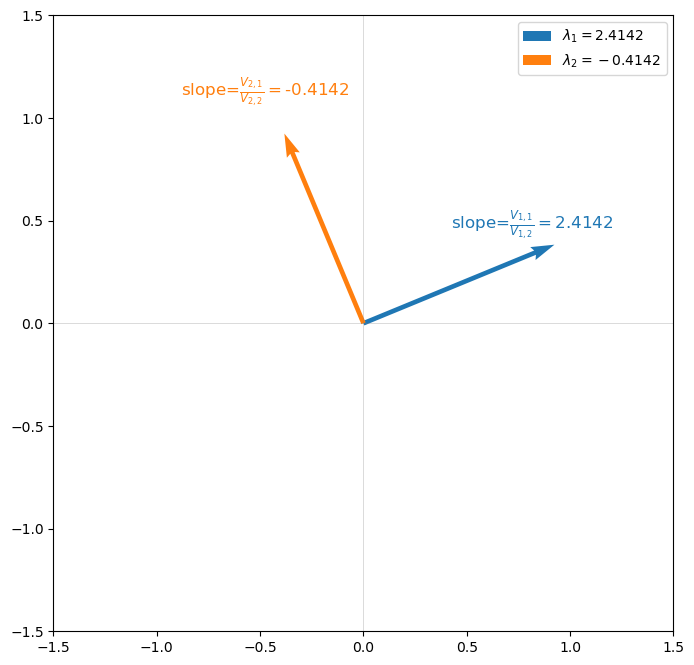

In [8]:
# Plotting the eigenvectors
plt.figure(figsize=(8, 8))

plt.quiver(0, 0, V[0, 0], V[1, 0], angles='xy', scale_units='xy', 
           scale=1, color='C0', label=fr'$\lambda_1={np.round(Λ[0], 4)}$')
plt.quiver(0, 0, V[0, 1], V[1, 1], angles='xy', scale_units='xy', 
           scale=1, color='C1', label=fr'$\lambda_2={np.round(Λ[1], 4)}$')

# Annotating the slopes
plt.text(V[0, 0]-0.5, V[1, 0]*1.2, 
         r'slope=$\frac{V_{1,1}}{V_{1,2}}=$'+f'{np.round(V[0, 0] / V[1, 0], 4)}', 
         fontsize=12, color='C0')
plt.text(V[0, 1]-0.5, V[1, 1]*1.2, 
         r'slope=$\frac{V_{2,1}}{V_{2,2}}=$'+f'{np.round(V[0, 1] / V[1, 1], 4)}', 
         fontsize=12, color='C1')

# Adding labels
plt.axhline(0, color='grey', linewidth=0.5, alpha=0.4)
plt.axvline(0, color='grey', linewidth=0.5, alpha=0.4)
plt.legend()

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

## Invariant subspace approach 

The preceding  calculation indicates that we can use the eigenvectors $V$ to construct 2-dimensional  *invariant subspaces*.

We'll pursue that possibility now.

Define the transformed variables


$$
x_t^* = V^{-1} x_t
$$

Evidently, we can recover $x_t$ from $x_t^*$:

$$
x_t = V x_t^*
$$


The following notations and equations will help us.

Let 

$$

V = \begin{bmatrix} V_{1,1} & V_{1,2} \cr 
                         V_{2,1} & V_{2,2} \end{bmatrix}, \quad
V^{-1} = \begin{bmatrix} V^{1,1} & V^{1,2} \cr 
                         V^{2,1} & V^{2,2} \end{bmatrix}
$$

Notice that it follows from

$$
 \begin{bmatrix} V^{1,1} & V^{1,2} \cr 
                         V^{2,1} & V^{2,2} \end{bmatrix} \begin{bmatrix} V_{1,1} & V_{1,2} \cr 
                         V_{2,1} & V_{2,2} \end{bmatrix} = \begin{bmatrix} 1  & 0 \cr 0 & 1 \end{bmatrix}
$$

that

$$
V^{2,1} V_{1,1} + V^{2,2} V_{2,1} = 0
$$

and

$$
V^{1,1}V_{1,2} + V^{1,2} V_{2,2} = 0.
$$

These equations will be very useful soon.


Notice that

$$
\begin{bmatrix} x_{1,t+1}^* \cr x_{2,t+1}^* \end{bmatrix} = \begin{bmatrix} \lambda_1  & 0 \cr 0 & \lambda_2 \end{bmatrix}
\begin{bmatrix} x_{1,t}^* \cr x_{2,t}^* \end{bmatrix}
$$

To deactivate $\lambda_1$ we want to set

$$
x_{1,0}^* = 0.
$$


This can be achieved by setting 

$$
x_{2,0} =  -( V^{1,2})^{-1} V^{1,1} x_{1,0} = V_{2,2} V_{1,2}^{-1} x_{1,0}.
$$ (eq:deactivate1)

To deactivate $\lambda_2$, we want to  set

$$
x_{2,0}^* = 0
$$

This can be achieved by setting 

$$
x_{2,0} = -(V^{2,2})^{-1} V^{2,1} x_{1,0} = V_{2,1} V_{1,1}^{-1} x_{1,0}.
$$ (eq:deactivate2)

Let's verify {eq}`eq:deactivate1` and {eq}`eq:deactivate2` below

To deactivate $\lambda_1$ we use {eq}`eq:deactivate1`

In [9]:
xd_1 = np.array((x_0[0], 
                 V[1,1]/V[0,1] * x_0[0]),
                dtype=np.float64)

# Compute x_{1,0}^*
np.round(V_inv @ xd_1, 8)

array([-0.        , -5.22625186])

We find $x_{1,0}^* = 0$.

Now we deactivate $\lambda_2$ using {eq}`eq:deactivate2`

In [10]:
xd_2 = np.array((x_0[0], 
                 V[1,0]/V[0,0] * x_0[0]), 
                 dtype=np.float64)

# Compute x_{2,0}^*
np.round(V_inv @ xd_2, 8)

array([2.1647844, 0.       ])

We find $x_{2,0}^* = 0$.

In [11]:
# Simulate with muted λ1 λ2.
num_steps = 10
xs_λ1 = iterate_M(xd_1, M, num_steps)[0]
xs_λ2 = iterate_M(xd_2, M, num_steps)[0]

# Compute ratios y_t / y_{t-1}
ratios_λ1 = xs_λ1[1, 1:] / xs_λ1[1, :-1]
ratios_λ2 = xs_λ2[1, 1:] / xs_λ2[1, :-1] 

The following graph shows the ratios $y_t / y_{t-1}$ for the two cases.

We find that the ratios converge to $\lambda_2$ in the first case and $\lambda_1$ in the second case.

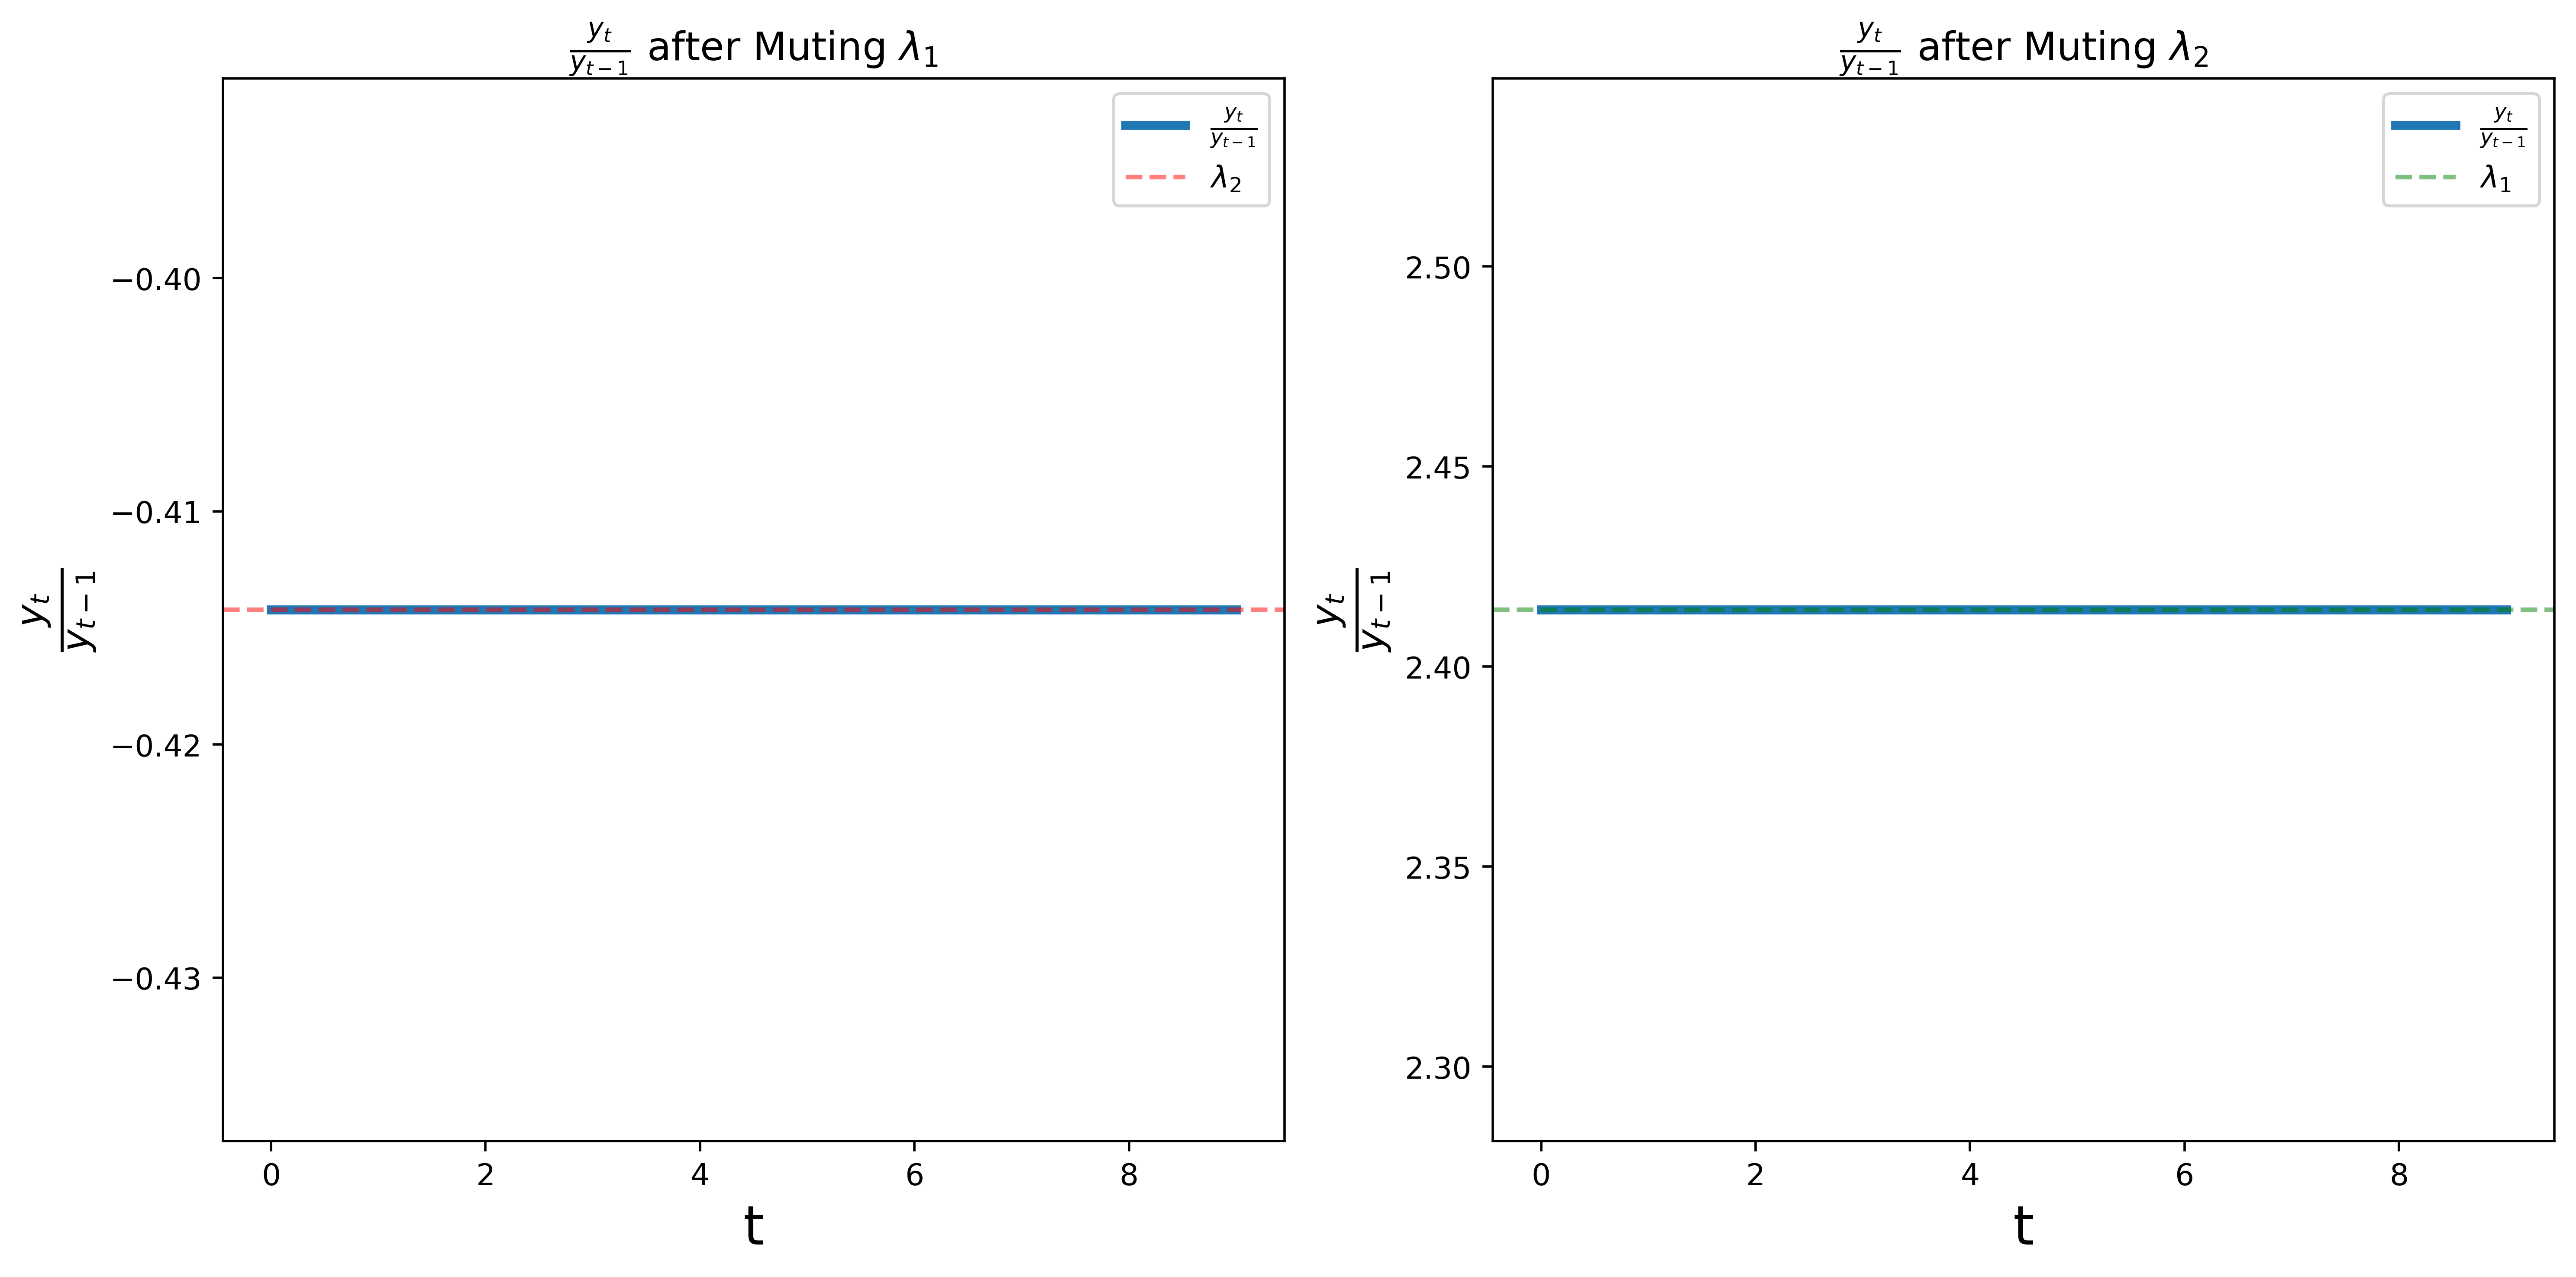

In [12]:
# Plot the ratios for y_t / y_{t-1}
fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=500)

# First subplot
axs[0].plot(np.round(ratios_λ1, 6), 
            label=r'$\frac{y_t}{y_{t-1}}$', linewidth=3)
axs[0].axhline(y=Λ[1], color='red', linestyle='--', 
               label='$\lambda_2$', alpha=0.5)
axs[0].set_xlabel('t', size=18)
axs[0].set_ylabel(r'$\frac{y_t}{y_{t-1}}$', size=18)
axs[0].set_title(r'$\frac{y_t}{y_{t-1}}$ after Muting $\lambda_1$', 
                 size=13)
axs[0].legend()

# Second subplot
axs[1].plot(ratios_λ2, label=r'$\frac{y_t}{y_{t-1}}$', 
            linewidth=3)
axs[1].axhline(y=Λ[0], color='green', linestyle='--', 
               label='$\lambda_1$', alpha=0.5)
axs[1].set_xlabel('t', size=18)
axs[1].set_ylabel(r'$\frac{y_t}{y_{t-1}}$', size=18)
axs[1].set_title(r'$\frac{y_t}{y_{t-1}}$ after Muting $\lambda_2$', 
                 size=13)
axs[1].legend()

plt.tight_layout()
plt.show()

## Concluding remarks

This lecture sets the stage  for many other applications of the *invariant subspace* methods.

All of these exploit very similar equations based on eigen decompositions. 

We shall encounter equations very similar to {eq}`eq:deactivate1` and {eq}`eq:deactivate2`
in {doc}`money_inflation` and in many other places in dynamic economic theory.


## Exercise

```{exercise-start} 
:label: greek_square_ex_a
```
Please use matrix algebra to formulate the method described by Bertrand Russell at the beginning of this lecture.  

1.  Define a state vector $x_t = \begin{bmatrix} a_t \cr b_t \end{bmatrix}$.
2.  Formulate a first-order vector difference equation for $x_t$ of the form $x_{t+1} = A x_t$ and
compute the matrix $A$.
3.  Use the system $x_{t+1} = A x_t$ to replicate the sequence of $a_t$'s and $b_t$'s described by Bertrand Russell.
4.  Compute the eigenvectors and eigenvalues of $A$ and compare them to corresponding objects computed in the text of this lecture. 

```{exercise-end} 
```

```{solution-start} greek_square_ex_a
:class: dropdown
```

Here is one soluition.

According to the quote, we can formulate 

$$
\begin{aligned}
a_{t+1} &= a_t + b_t \\
b_{t+1} &= 2a_t + b_t
\end{aligned}
$$ (eq:gs_ex1system)

with $x_0 = \begin{bmatrix}  a_0 \cr b_0 \end{bmatrix} = \begin{bmatrix}  1 \cr 1 \end{bmatrix}$

By {eq}`eq:gs_ex1system`, we can write matrix $A$ as 

$$
A = \begin{bmatrix} 1 & 1 \cr 
                2 & 1 \end{bmatrix}
$$

Then $x_{t+1} = A x_t$ for $t \in \{0, \dots, 5\}$

In [13]:
# Define the matrix A
A = np.array([[1, 1],
              [2, 1]])

# Initial vector x_0
x_0 = np.array([1, 1])

# Number of iterations
n = 6

# Generate the sequence
xs = np.array([x_0])
x_t = x_0
for _ in range(1, n):
    x_t = A @ x_t
    xs = np.vstack([xs, x_t])

# Print the sequence
for i, (a_t, b_t) in enumerate(xs):
    print(f"Iter {i}: a_t = {a_t}, b_t = {b_t}")

# Compute eigenvalues and eigenvectors of A
eigenvalues, eigenvectors = np.linalg.eig(A)

print(f'\nEigenvalues:\n{eigenvalues}')
print(f'\nEigenvectors:\n{eigenvectors}')

Iter 0: a_t = 1, b_t = 1
Iter 1: a_t = 2, b_t = 3
Iter 2: a_t = 5, b_t = 7
Iter 3: a_t = 12, b_t = 17
Iter 4: a_t = 29, b_t = 41
Iter 5: a_t = 70, b_t = 99

Eigenvalues:
[ 2.41421356 -0.41421356]

Eigenvectors:
[[ 0.57735027 -0.57735027]
 [ 0.81649658  0.81649658]]


```{solution-end}
```